# MatPlotLib

https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

#### TODO
- Examples for most of these : https://matplotlib.org/tutorials/introductory/sample_plots.html

## Lines

In [1]:
import matplotlib.pyplot as plt
import numpy as np

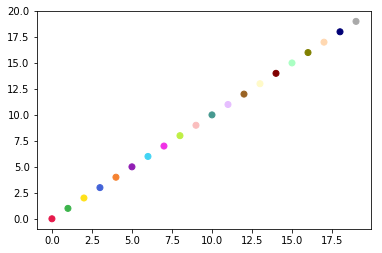

In [20]:
#This is just here for other visualizations that need a diverse selection of colors
colorz = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabebe',
 '#469990', '#e6beff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9']

x = np.arange(len(colorz))
plt.scatter(x,x,c=colors)
plt.show()

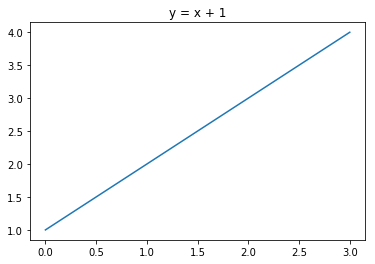

In [15]:
plt.plot([1,2,3,4])
plt.title('y = x + 1')
plt.show()

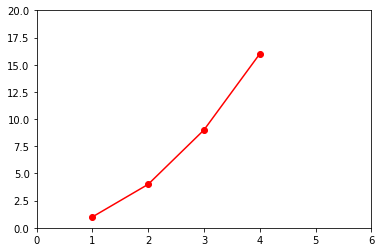

In [13]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro-')   #plot x vs y, where 'ro-' -> points as Red O's with a line -
plt.axis([0,6,0,20])    #x axis is 0 -> 6, y axis is 0 -> 20
plt.show()

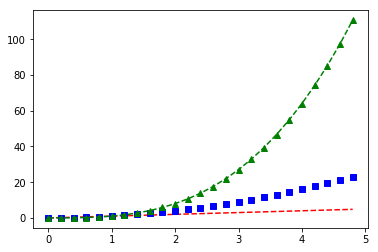

In [5]:
seq_data = np.arange(0., 5., 0.2)   #range of floats from 0 to 5, step size of .2

plt.plot(seq_data,seq_data, 'r--', seq_data, seq_data**2, 'bs', seq_data,seq_data**3, "g^--")
plt.show()

### Subplots

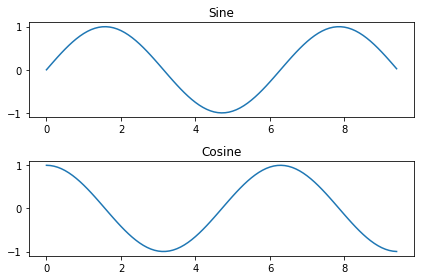

In [3]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

plt.tight_layout()
# Show the figure.
plt.show()

## Scatter plots

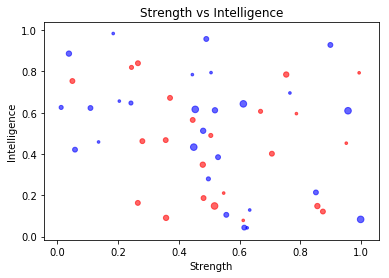

In [14]:
#Scatter plot

#Here we are using a scatter plot to show 4 dimensions of data
# The first 2 dimensions are attributes and are represented in our graphic with x,y values
# The third dimension is another attribute and is represented in our graphic with size
# The fourth dimension is the label for each data point and is represented with color

data = np.random.rand(50,4)  #50 sets of random 4-tuples

#assign a 'label' to datasets based on the 4th attribute
colors = ['blue' if x[3] > 0.5 else 'red' for x in data]

#assign size according to the 3rd attribute
sizes = data[:2] * 80

plt.scatter(data[:,0], data[:,1], alpha=0.6,
             s=sizes, c=colors)
plt.title('Strength vs Intelligence')
plt.xlabel('Strength')
plt.ylabel('Intelligence');

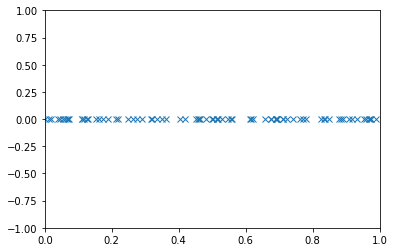

In [6]:
# Plot 1d data in 2 dimensions (along the x axis)

vals = np.random.rand(80)
plt.plot(vals, np.zeros_like(vals), 'x')
plt.axis([0, 1, -1,1])
plt.show()


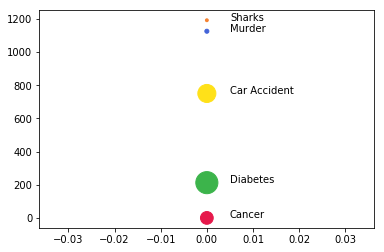

In [28]:
import matplotlib.pyplot as plt

# Assume that we have a dictionary of the form label : count (think clojure's frequencies output) and
# we want to show that data to the user.

sample = {'Cancer' : 100, 'Diabetes' : 300, 'Car Accident' : 200, 'Murder' : 10, 'Sharks' : 5}
colors = {'Cancer' : '#e6194B', 'Diabetes' : '#3cb44b', 'Car Accident' : '#ffe119', 'Murder' : '#4363d8', 'Sharks' : '#f58231'}

y_floor = 0
total = sum(sample.values())
scale = 1000

to_plot = []

for label,cnt in sample.items():
    size = scale * (cnt / total)
    
    to_plot.append(
        {'size' : size,
         'color' : colors[label],
         'label' : label,
         'y' : y_floor})
    
    y_floor += size + 50
    
    
y = list(map(lambda x : x['y'],to_plot))
colors = list(map(lambda x : x['color'],to_plot))
sizes = list(map(lambda x : x['size'],to_plot))

fig, ax = plt.subplots()
ax.scatter([0 for x in range(len(sample))],y, c=colors,s=sizes)

for itm in to_plot:
    ax.annotate(itm['label'], (0.005, itm['y']))
    
plt.show()

## Hover hints

In [ ]:
%matplotlib notebook

x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

# Pandas

In [32]:
import pandas as pd
import numpy as np

#NOTE : might need to rerun this if blue shading is missing


rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,0,1,2,3,4,5,6,7,8,9
0,1,0.35,0.4,0.46,0.073,-0.23,-0.73,0.48,-0.44,0.015
1,0.35,1,-0.28,0.57,-0.29,0.38,-0.36,0.64,0.25,0.19
2,0.4,-0.28,1,-0.52,0.15,-0.14,-0.093,0.016,-0.43,-0.38
3,0.46,0.57,-0.52,1,-0.23,-0.23,-0.48,0.47,0.28,0.45
4,0.073,-0.29,0.15,-0.23,1,-0.1,-0.15,-0.52,-0.61,-0.19
5,-0.23,0.38,-0.14,-0.23,-0.1,1,-0.03,0.42,0.21,0.095
6,-0.73,-0.36,-0.093,-0.48,-0.15,-0.03,1,-0.49,0.38,-0.35
7,0.48,0.64,0.016,0.47,-0.52,0.42,-0.49,1,0.38,0.42
8,-0.44,0.25,-0.43,0.28,-0.61,0.21,0.38,0.38,1,0.15
9,0.015,0.19,-0.38,0.45,-0.19,0.095,-0.35,0.42,0.15,1


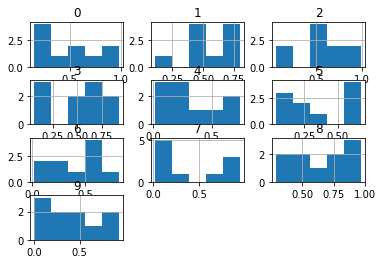

In [34]:
df.hist(bins=5);